In [ ]:
# Importación módulos
import sys
import numpy as np
np.set_printoptions(threshold=10000)
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
ruta =  '../imgpack/WorldView_1-1_PAN.png' # Consideramos que la imagen es monobanda
img2 = cv.imread(ruta,cv.IMREAD_GRAYSCALE) #Transformamos nuestra imagen a escala de grises

In [23]:
# Función filtro
def sobel(img):
    #rows, colums
    r,c = img.shape
    imgcopy = img.copy()
    resimg = np.zeros((r,c), dtype=int)
    sVert = np.array([
        [-1,0,1],
        [-2,0,2],
        [-1,0,1]
    ]) # Máscara Sobel Vertical
    
    sHor = np.array([
        [1,2,1],
        [0,0,0],
        [-1,-2,-1]
    ]) # Máscara Sobel Horizontal
    posocho = [(-1,-1),(-1,0),(-1,+1),(0,-1),(0,0),(0,+1),(+1,-1),(+1,0),(+1,+1)] # Vecinos que puede tener un pixel en 8-adyacencia
    for x in range(1,r-1):
        for y in range(1,c-1): # Eliminamos los bordes del bucle
            pximg = np.array([imgcopy[x+i,y+j] for i,j in posocho]) # Matriz 3x3 de la seccion de la imagen
            C = np.sum(sVert.flatten() * pximg)
            F = np.sum(sHor.flatten() * pximg)
            Z = np.sqrt(np.square(C)+np.square(F))
            resimg[x,y] = round(Z)
    return resimg

In [24]:
img = np.array([
    [12,14,17,24,32,30],
    [19,18,17,26,36,40],
    [26,21,17,28,40,42],
    [20,19,18,26,33,35],
    [14,17,20,23,27,20],
    [35,14,22,13,40,21]
    ])

print(sobel(img))

[[ 0  0  0  0  0  0]
 [ 0 29 35 78 58  0]
 [ 0 22 29 80 52  0]
 [ 0 18 27 63 60  0]
 [ 0  9 21 49 17  0]
 [ 0  0  0  0  0  0]]


In [26]:
img_exp = sobel(img2)

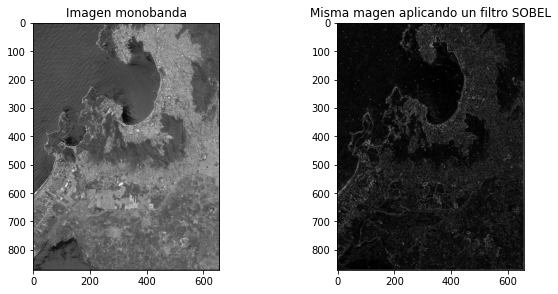

In [28]:
fig = plt.figure(figsize=(10, 10)) # Creamos nueva figura

fig.add_subplot(221)
plt.title('Imagen monobanda')
plt.imshow(img2,cmap='gray')
fig.add_subplot(222)
plt.title('Misma magen aplicando un filtro SOBEL')
plt.imshow(img_exp,cmap='gray')
plt.show()